<a href="https://colab.research.google.com/github/yousufcoxs/ML_Lab/blob/main/Diabetes_Prediction_using_Linear_Regression_ML_lab_report_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("/content/diabetes.csv")

In [4]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
zero_counts = (df == 0).sum()
print(zero_counts)


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [7]:
df["Pregnancies"] = df["Pregnancies"].replace(0,np.nan)
df["Pregnancies"] = df["Pregnancies"].fillna(df["Pregnancies"].mean())


In [8]:
df["Glucose"] = df["Glucose"].replace(0,np.nan)
df["Glucose"] = df["Glucose"].fillna(df["Glucose"].mean())


In [15]:
df["BloodPressure"] = df["BloodPressure"].replace(0,np.nan)
df["BloodPressure"] = df["BloodPressure"].fillna(df["BloodPressure"].mean())


In [17]:
df["SkinThickness"] = df["SkinThickness"].replace(0,np.nan)
df["SkinThickness"] = df["SkinThickness"].fillna(df["SkinThickness"].mean())

In [18]:
df["Insulin"] = df["Insulin"].replace(0,np.nan)
df["Insulin"] = df["Insulin"].fillna(df["Insulin"].mean())


In [19]:
df["BMI"] = df["BMI"].replace(0,np.nan)
df["BMI"] = df["BMI"].fillna(df["BMI"].mean())


In [20]:
glucose_max = df["Glucose"].max()

In [21]:
df.iloc[0,1] = glucose_max

In [22]:
glucose_max

199.0

In [23]:
glucose_min = df["Glucose"].min()
min_age = df["Age"].min()


In [24]:
print(glucose_min)
print(min_age)


44.0
21


In [25]:
df.loc[df["Age"]==min_age,"Glucose"] = glucose_min

In [26]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,199.0,72.0,35.0,155.548223,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,155.548223,26.6,0.351,31,0


In [27]:
zero_counts = (df == 0).sum()
print(zero_counts)


Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


**Modeling**

In [28]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]


In [30]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)


In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [32]:
print(model.intercept_)
print(model.coef_)


-0.8448207017673028
[ 1.17655847e-02  4.68809155e-03 -1.06091168e-03 -2.91684285e-05
  4.17114491e-05  1.45240652e-02  1.00214206e-01  4.49455433e-03]


In [33]:
y_pred = model.predict(x_test)

In [34]:
df1 = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

In [35]:
df1.head()

,Actual,Predicted
668,0,0.360812
324,0,-0.061301
624,0,-0.119713
690,0,0.267585
473,0,0.465317


In [36]:
df1.loc[df1["Predicted"]<0.5,"Predicted"] = 0
df1.loc[df1["Predicted"]>=0.5,"Predicted"] = 1


In [37]:
df1.head(2)

,Actual,Predicted
668,0,0.0
324,0,0.0


In [43]:
y_pred = df1["Predicted"].values

In [46]:
from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix, precision_score, recall_score, f1_score
print("Accuracy: ", accuracy_score(y_test,y_pred))
print("Mean Square Error: ",mean_squared_error(y_test,y_pred))

Accuracy:  0.7792207792207793
Mean Square Error:  0.22077922077922077


In [47]:
cm = confusion_matrix(y_test,y_pred)
print(cm)


[[86 13]
 [21 34]]


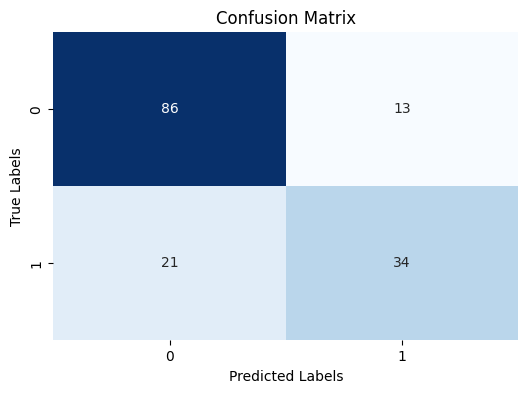

In [49]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [51]:
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("F1 Score: ", f1)

Precision Score:  0.723404255319149
Recall Score:  0.6181818181818182
F1 Score:  0.6666666666666666
